What are the most Demanded skills for the top 3 most popular data roles in th Philippines?

In [21]:
#import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import data
df = pd.read_csv("data_jobs.csv")


#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#Convert Job Skills from String to List
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [22]:
df.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,NaN,NaN,NaN,Zitec,"[sql, nosql, gcp, azure, aws, bigquery, databr...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,NaN,NaN,NaN,Hempel,"[excel, powerpoint, power bi]","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [23]:
df_ph = df[df['job_country'] == 'Philippines'].copy()

In [24]:
df_skills = df_ph.explode('job_skills').dropna(subset=['job_skills'])
df_skills [['job_title', 'job_skills']]

,job_title,job_skills
76,Data Analyst - 14785091749,sql
76,Data Analyst - 14785091749,python
76,Data Analyst - 14785091749,r
76,Data Analyst - 14785091749,excel
76,Data Analyst - 14785091749,tableau
...,...,...
785690,Customer Master Data Specialist,vba
785690,Customer Master Data Specialist,sap
785690,Customer Master Data Specialist,word
785690,Customer Master Data Specialist,powerpoint


In [25]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
276,excel,Data Analyst,2242
1002,sql,Data Analyst,1781
1003,sql,Data Engineer,1303
777,python,Data Engineer,1097
776,python,Data Analyst,980
...,...,...,...
1060,t-sql,Machine Learning Engineer,1
169,codecommit,Data Engineer,1
168,cobol,Software Engineer,1
167,clickup,Senior Data Analyst,1


In [26]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

job_titles

['Business Analyst', 'Data Analyst', 'Data Engineer']

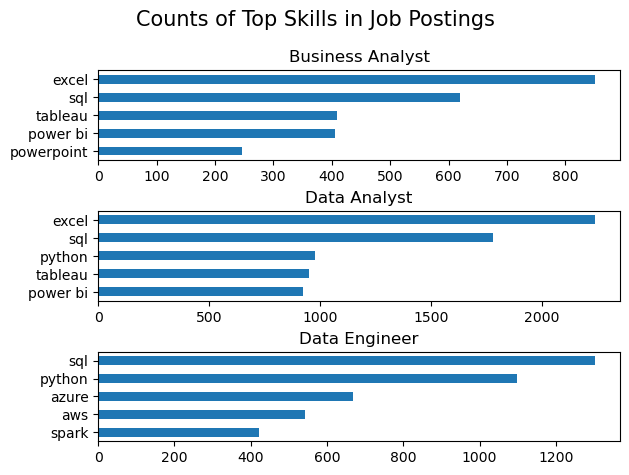

In [27]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

    fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
    fig.tight_layout(h_pad=0.5) #fix the overlap of the title and labels
    
    

In [28]:
df_job_title_count = df_ph['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,4766
1,Data Engineer,2051
2,Business Analyst,1725
3,Data Scientist,1347
4,Software Engineer,546
5,Senior Data Analyst,542
6,Senior Data Engineer,299
7,Cloud Engineer,200
8,Senior Data Scientist,186
9,Machine Learning Engineer,124


In [29]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,excel,Data Analyst,2242,4766,47.041544
1,sql,Data Analyst,1781,4766,37.368863
2,sql,Data Engineer,1303,2051,63.529985
3,python,Data Engineer,1097,2051,53.486104
4,python,Data Analyst,980,4766,20.562316
...,...,...,...,...,...
1223,t-sql,Machine Learning Engineer,1,124,0.806452
1224,codecommit,Data Engineer,1,2051,0.048757
1225,cobol,Software Engineer,1,546,0.183150
1226,clickup,Senior Data Analyst,1,542,0.184502


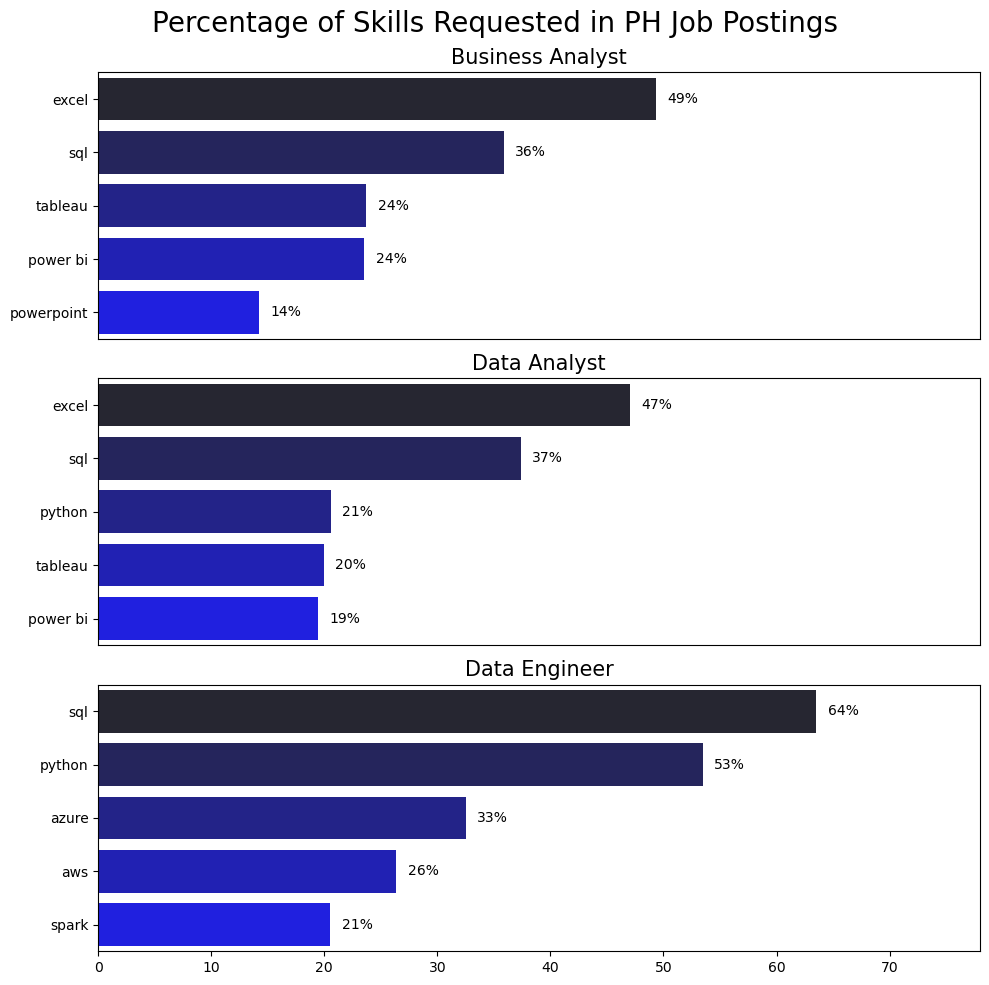

In [30]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 10))  

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r', dodge=False)
    ax[i].set_title(job_title, fontsize=15)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Percentage of Skills Requested in PH Job Postings', fontsize=20)
fig.tight_layout()
plt.show()
